### 1. 패키지 설치

In [1]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split

# 모델 객체 생성
from tensorflow.keras.models import Sequential

# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense

#### 2. 데이터 셋 준비

In [2]:
origin = read_excel("https://data.hossam.kr/E04/cars.xlsx")
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


### 3. 데이터 전처리

In [3]:
# 결측치 확인
origin.isnull().sum()

speed    0
dist     0
dtype: int64

### 4. 탐색적 데이터 분석

In [4]:
# 기술통계 확인
origin.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


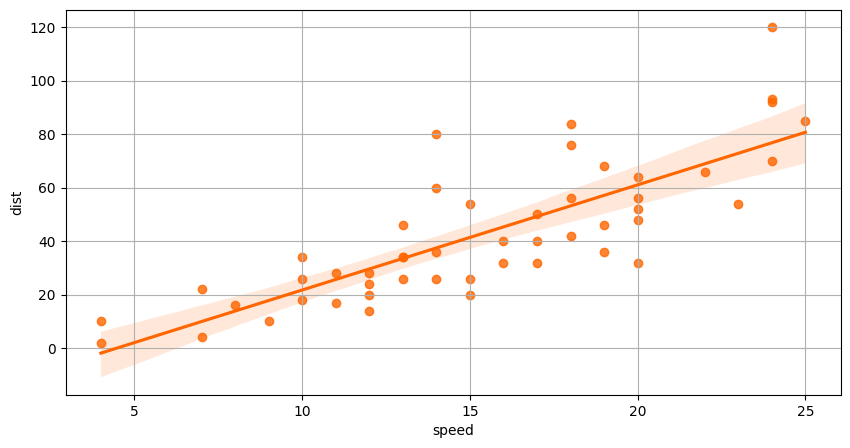

In [5]:
#산점도 확인
plt.figure(figsize=(10,5))
sb.regplot(data=origin, x='speed', y='dist', color='#ff6600')
plt.grid()
plt.show()
plt.close()

> degree 결정하기 위한 산점도 그래프 확인 -> 선형모델 -> 단순선형회귀모델 적용

### 5. 데이터 분리

In [6]:
# 랜덤시드 고정
np.random.seed(777)

In [15]:
# 훈련데이터(독립변수)와 레이블(종속변수)구분
x = origin.drop(['dist'], axis=1)
y = origin['dist']
print("훈련데이터크기:", x.shape, "/레이블크기:", y.shape)


훈련데이터크기: (50, 1) /레이블크기: (50,)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=777)

### 6. 모델 생성

In [17]:
# 객체생성
model = Sequential()
# 첫번째 층 : 32layers & 활성화함수는 relu & input_shape(독립변수)는 1개
model.add(Dense(32, activation='relu', input_shape=(1, )))
# 마지막 층
model.add(Dense(1, activation='linear'))
# 옵티마이저=adam, 손실함수=mse, 평가지표 metrics=mae
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                64        
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# 학습하기 위한 용도는 아니며 loss와 model의 metrics(보통 accuracy)를 평가하기위해 사용
result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))

result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index + 1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
2/2 [==============================] - 1s 205ms/step - loss: 3006.1763 - mae: 47.4252 - val_loss: 2104.7847 - val_mae: 40.3195
Epoch 2/500
2/2 [==============================] - 0s 35ms/step - loss: 2980.9448 - mae: 47.1886 - val_loss: 2086.0510 - val_mae: 40.1127
Epoch 3/500
2/2 [==============================] - 0s 32ms/step - loss: 2955.2397 - mae: 46.9562 - val_loss: 2067.4446 - val_mae: 39.9063
Epoch 4/500
2/2 [==============================] - 0s 32ms/step - loss: 2931.1799 - mae: 46.7289 - val_loss: 2049.2661 - val_mae: 39.7036
Epoch 5/500
2/2 [==============================] - 0s 32ms/step - loss: 2906.0793 - mae: 46.5011 - val_loss: 2031.4292 - val_mae: 39.5038
Epoch 6/500
2/2 [==============================] - 0s 34ms/step - loss: 2881.5725 - mae: 46.2776 - val_loss: 2013.3379 - val_mae: 39.3000
Epoch 7/500
2/2 [==============================] - 0s 33ms/step - loss: 2857.2734 - mae: 46.0495 - val_loss: 1995.0388 - val_mae: 39.0929
Epoch 8/500
2/2 [================

,loss,mae,val_loss,val_mae
epochs,,,,
1,3006.176270,47.425232,2104.784668,40.319481
2,2980.944824,47.188599,2086.051025,40.112717
3,2955.239746,46.956165,2067.444580,39.906307
4,2931.179932,46.728901,2049.266113,39.703625
5,2906.079346,46.501076,2031.429199,39.503761
...,...,...,...,...
496,271.095947,13.066001,254.501816,13.333446
497,271.171722,13.079149,255.049225,13.366596
498,271.279816,13.093605,255.467606,13.391572


### 7. 학습 모델 평가

#### 1. 시각화

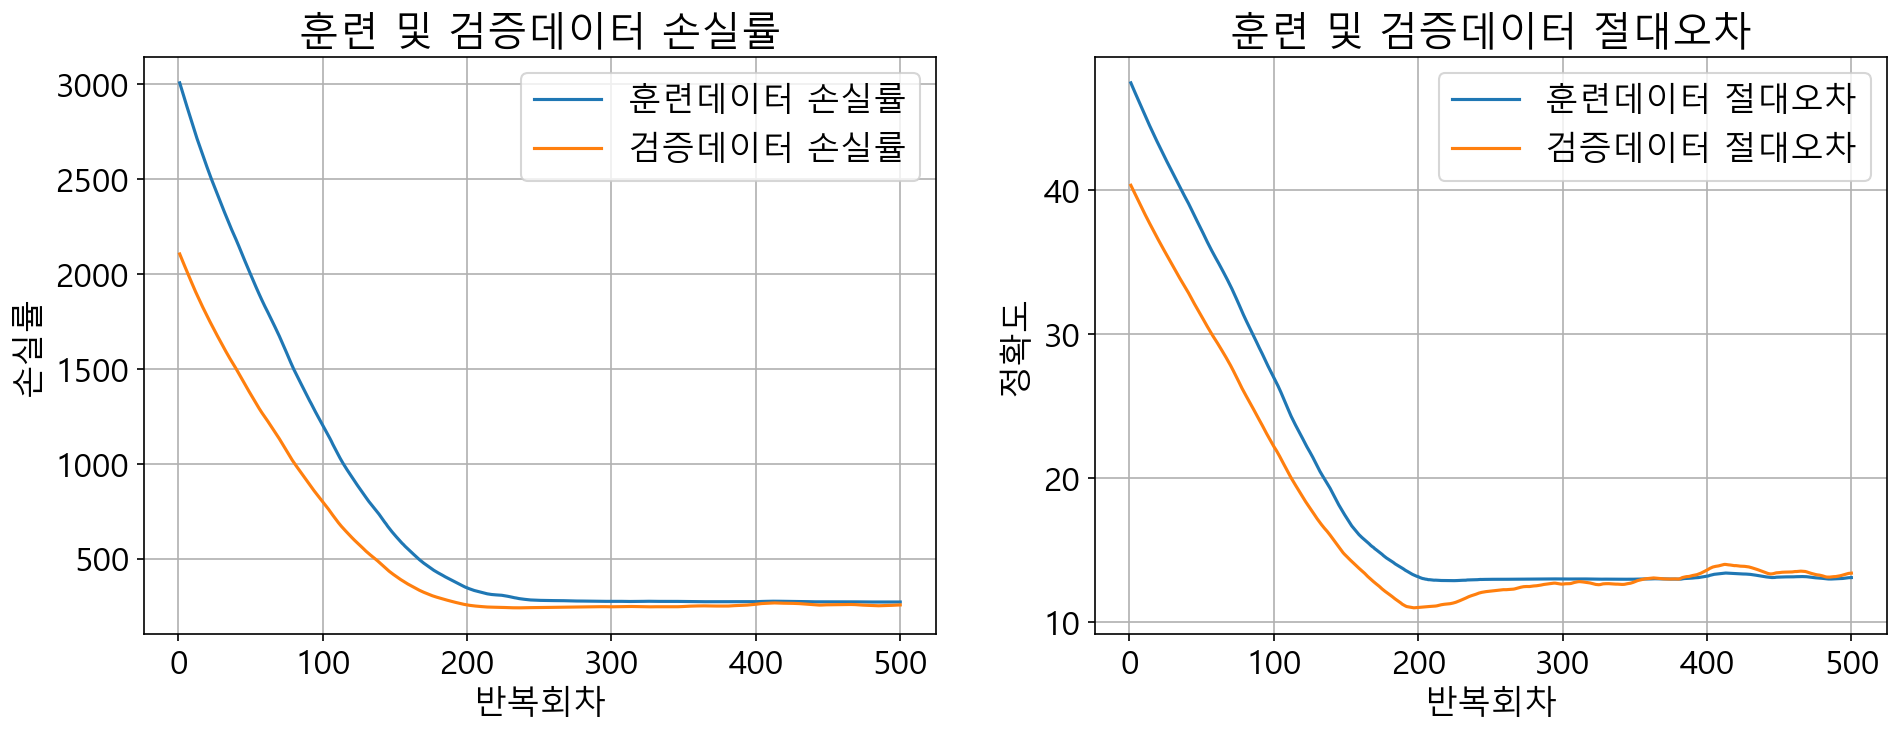

In [20]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5), dpi=150)

# 손실률
sb.lineplot(data=result_df, x=result_df.index, y='loss', label='훈련데이터 손실률', ax=ax1)
sb.lineplot(data=result_df, x=result_df.index, y='val_loss', label='검증데이터 손실률', ax=ax1)
ax1.set_title('훈련 및 검증데이터 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 절대오차
sb.lineplot(data=result_df, x=result_df.index, y='mae', label='훈련데이터 절대오차', ax=ax2)
sb.lineplot(data=result_df, x=result_df.index, y='val_mae', label='검증데이터 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증데이터 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

In [21]:
# 모델 성능 평가
evaluate1 = model.evaluate(x_train, y_train)
evaluate2 = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 255.8052 - mae: 13.4117


### 8. 학습 모델 적용

In [22]:
# 테스트 데이터에 대한 예측 결과 산정
results = model.predict(x_test)
results

1/1 [==============================] - 0s 74ms/step


array([[68.49015 ],
       [39.33738 ],
       [36.422104],
       [33.506824],
       [56.82904 ],
       [42.25266 ],
       [42.25266 ],
       [53.91376 ],
       [36.422104],
       [56.82904 ],
       [42.25266 ],
       [59.744316],
       [21.845718],
       [39.33738 ],
       [13.099888]], dtype=float32)

In [23]:
kdf = DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test,
    '예측값': results.flatten()
})

kdf['예측오차'] = kdf['실제값'] - kdf['예측값']

kdf

,검증데이터,실제값,예측값,예측오차
44,23,54,68.490150,-14.490150
17,13,34,39.337379,-5.337379
11,12,14,36.422104,-22.422104
9,11,17,33.506824,-16.506824
36,19,46,56.829041,-10.829041
21,14,60,42.252659,17.747341
22,14,80,42.252659,37.747341
31,18,42,53.913761,-11.913761
12,12,20,36.422104,-16.422104
37,19,68,56.829041,11.170959


In [ ]:
helper.regplot(x_left=kdf['검증데이터'], y_left=kdf['실제값'], y_left_pred=kdf['예측값'])

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

sb.scatterplot(x=kdf['검증데이터'], y=kdf['실제값'])

*****************

### 1. 패키지 설치

In [1]:
from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


### 2. 데이터셋 준비

In [2]:
origin = read_excel("https://data.hossam.kr/F02/fish2.xlsx")
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      56 non-null     float64
 1   높이      56 non-null     float64
 2   두께      56 non-null     float64
 3   무게      56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


### 3. 데이터 전처리

In [3]:
# 결측치 확인
origin.isnull().sum()

길이    0
높이    0
두께    0
무게    0
dtype: int64

In [4]:
# 기초통계량 확인
origin.describe()

,길이,높이,두께,무게
count,56.000000,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536,382.239286
std,9.021668,2.878343,1.775006,347.617717
min,8.400000,2.110000,1.410000,5.900000
25%,21.825000,5.690000,3.520000,120.000000
50%,25.300000,6.920000,4.155000,207.500000
75%,36.625000,10.850000,6.450000,692.500000
max,44.000000,12.800000,8.140000,1100.000000


### 4. 탐색적 데이터 분석

In [6]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['axes.unicode_minus'] = False

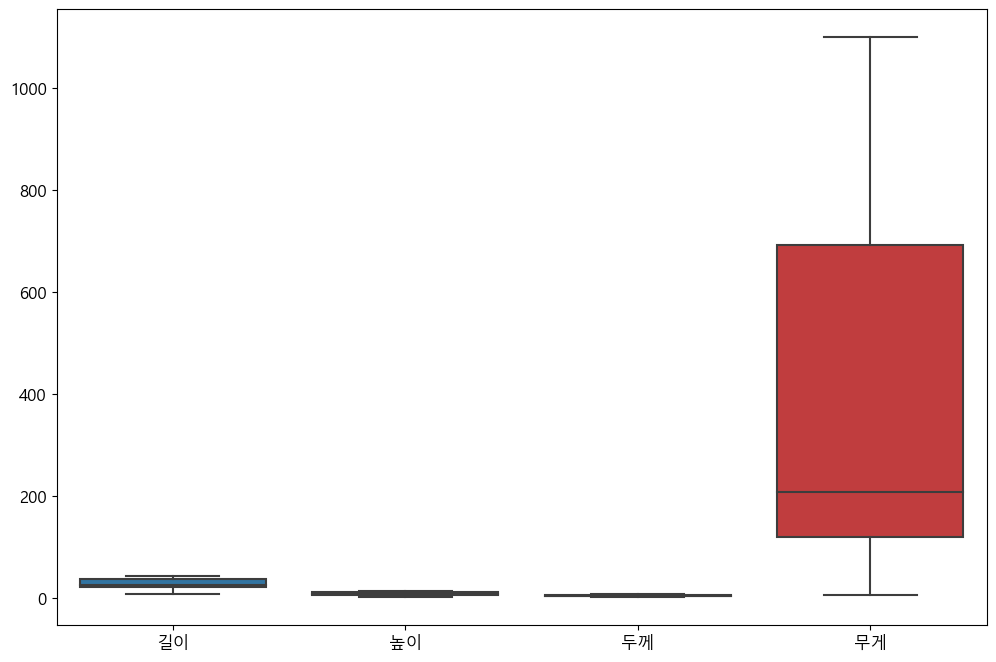

In [7]:
# 상자그림
sb.boxplot(data=origin)
plt.show()
plt.close()

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


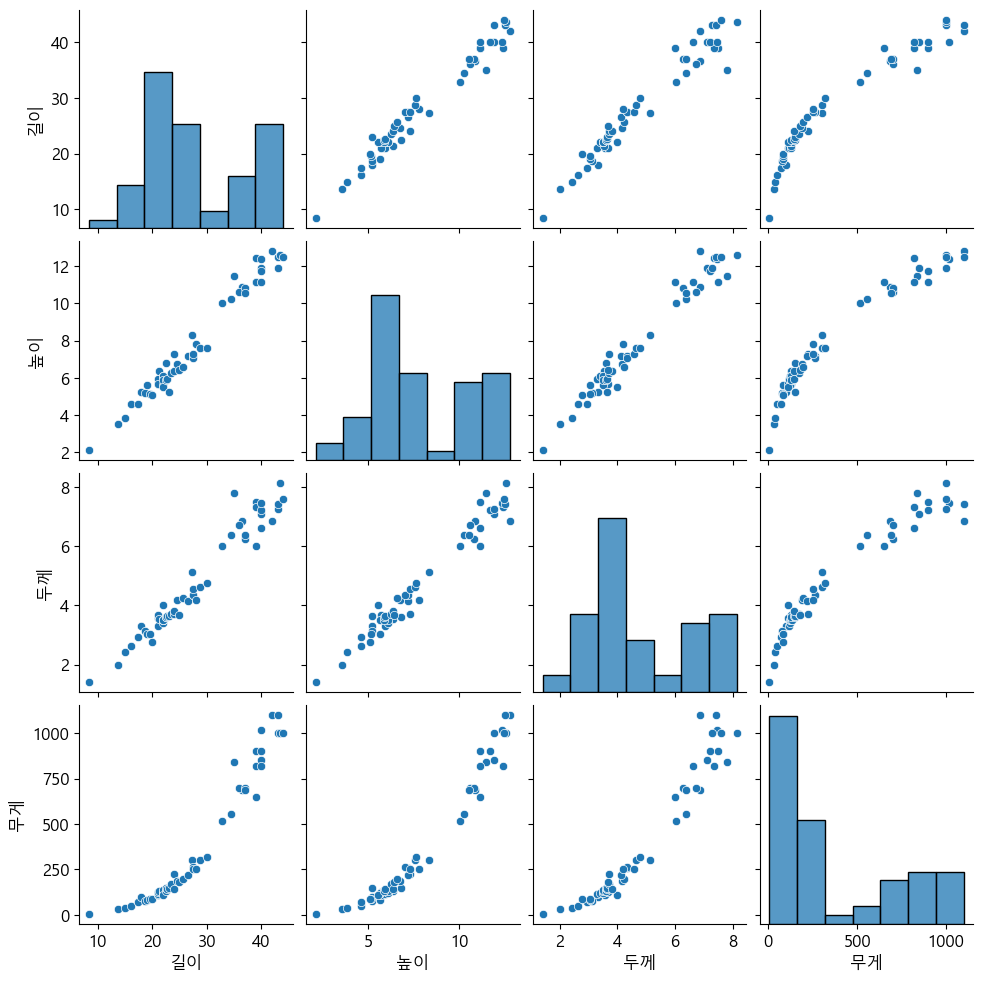

In [8]:
# 산점도 그래프 확인
sb.pairplot(data=origin)
plt.show()
plt.close()

> Degree를 결정하기 위함 = 다항식이 적당해보인다.

### 5. 데이터 분리

In [9]:
# 랜덤시드 고정
np.random.seed(777)

In [10]:
# 훈련데이터와 검증데이터 분리
x = origin[['길이','두께','높이']]
y = origin[['무게']]
x.shape, y.shape

((56, 3), (56, 1))

In [11]:
# 표준화 (독립변수만)
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
x_scale.shape

(56, 3)

In [12]:
# 훈련데이터와 검증데이터 분리하기
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3, random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39, 3), (17, 3), (39, 1), (17, 1))

### 6. 모델 생성

In [13]:
# 모델 객체 생성
model = Sequential()

# 첫번째 층
model.add(Dense(64, activation='relu', input_shape=(len(x_train[0]), )))

# 은닉층
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))

# 마지막 층
model.add(Dense(1, activation='linear'))

# 모델 환경설정하기
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 3

In [17]:
# 학습하기
result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), callbacks=[
    EarlyStopping(monitor='val_loss', patience=10, verbose=1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.001, verbose=1)
])

Epoch 1/500
2/2 [==============================] - 1s 178ms/step - loss: 283588.0312 - mae: 395.7971 - val_loss: 221861.1875 - val_mae: 351.2965 - lr: 0.0010
Epoch 2/500
2/2 [==============================] - 0s 27ms/step - loss: 283569.4375 - mae: 395.7766 - val_loss: 221846.6250 - val_mae: 351.2830 - lr: 0.0010
Epoch 3/500
2/2 [==============================] - 0s 38ms/step - loss: 283553.2500 - mae: 395.7633 - val_loss: 221832.9219 - val_mae: 351.2721 - lr: 0.0010
Epoch 4/500
2/2 [==============================] - 0s 29ms/step - loss: 283538.7812 - mae: 395.7517 - val_loss: 221824.1875 - val_mae: 351.2640 - lr: 0.0010
Epoch 5/500
2/2 [==============================] - 0s 31ms/step - loss: 283526.5625 - mae: 395.7420 - val_loss: 221816.5938 - val_mae: 351.2582 - lr: 0.0010
Epoch 6/500
2/2 [==============================] - 0s 27ms/step - loss: 283516.3438 - mae: 395.7349 - val_loss: 221810.4531 - val_mae: 351.2536 - lr: 0.0010
Epoch 7/500
2/2 [==============================] - 0s 30m

### 7. 학습모델 평가

In [18]:
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index + 1
result_df.set_index('epochs', inplace=True)
result_df

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,283588.03125,395.797089,221861.187500,351.296478,0.001
2,283569.43750,395.776642,221846.625000,351.282990,0.001
3,283553.25000,395.763336,221832.921875,351.272125,0.001
4,283538.78125,395.751740,221824.187500,351.264038,0.001
5,283526.56250,395.741974,221816.593750,351.258209,0.001
...,...,...,...,...,...
496,282754.87500,394.776428,221139.781250,350.298279,0.001
497,282753.21875,394.774445,221138.406250,350.296326,0.001
498,282751.75000,394.772491,221137.015625,350.294373,0.001


In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5), dpi=150)

### 8. 학습 모델 적용